## Closeness Centrality

In [ ]:
!pip install networkx

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ppw/ppw/crawling_berita_new.csv')
data

,Judul,Isi,Kategori
0,"Debut IMAG Sukses, KONI Pusat: Tahun Depan Leb...",Pekan Olahraga Bela Diri Nasional atau Indones...,Sport
1,Nikmati Pengalaman Santap Steak Lezat di Mad C...,"Suasana yang nyaman dengan makanan lezat, inil...",Food
2,"Arus Barang Impor Jadi Diperketat, Masa Transi...",Pemerintah terus melakukan sejumlah upaya untu...,Finance
3,Jorge Martin Promosi ke Ducati di 2024?,Rider Pramac Jorge Martin muncul sebagai penan...,Sport
4,Water Purifier Tenaga Surya Menangkan AHM Best...,Jakarta - PT Astra Honda Motor menggelar AHM B...,Edukasi
...,...,...,...
155,"Sempat Mangkrak, Proyek Tol Gilimanuk-Mengwi B...",Pemerintah akan segera melelang ulang proyek T...,Finance
156,"Pahami Perbedaan Tekstil, Garmen, dan Konveksi",Bisnis pakaian adalah salah satu bisnis yang s...,Finance
157,Gado-gado Racikan Mak Gobang yang Terkenal di BSD,Jakarta - Gado Gado Mak Gobang yang dulunya be...,Food
158,"Harta Karun Migas Papua Sudah Dilelang, Diinca...",Kementerian Energi dan Sumber Daya Mineral (ES...,Finance


In [ ]:
hasil_kalimat=[]
for i in range(len(data)):
  token = sent_tokenize(data['Isi'][i])
  hasil_kalimat.append(token)

In [ ]:
kalimat = []
for i in range(len(hasil_kalimat)):
  for x in range (len(hasil_kalimat[i])):
    datacek = []
    datacek.append(i)
    datacek.append(hasil_kalimat[i][x])
    kalimat.append(datacek)

In [ ]:
databaru = pd.DataFrame(kalimat, columns=["Dokumen ke", "Kalimat"])
databaru

,Dokumen ke,Kalimat
0,0,Pekan Olahraga Bela Diri Nasional atau Indones...
1,0,KONI Pusat menjanjikan tahun depan lebih menarik.
2,0,IMAG pertama diselenggarakan di Kota Bekasi da...
3,0,Ajang ini mempertandingkan 9 cabang olahraga b...
4,0,"Hasilnya, kontingen Jawa Barat menjadi juara u..."
...,...,...
3459,159,"Megawati berhasil mengumpulkan 95 poin, jumlah..."
3460,159,"Bahkan, ia menjadi pencetak poin terbanyak yai..."
3461,159,Adapun Red Sparks telah memenangkan tiga dari ...
3462,159,Red Sparks dijadwalkan akan bertanding kembali...


In [ ]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(databaru['Kalimat'])

In [ ]:
# Menghitung cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Membuat graf untuk closeness centrality
G = nx.from_numpy_array(cosine_similarities)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menambahkan closeness centrality ke dalam dataframe kalimat
databaru['Closeness Centrality'] = [closeness_centrality[i] for i in range(len(databaru))]

# Menampilkan dataframe kalimat
print(databaru)

      Dokumen ke                                            Kalimat  \
0              0  Pekan Olahraga Bela Diri Nasional atau Indones...   
1              0  KONI Pusat menjanjikan tahun depan lebih menarik.   
2              0  IMAG pertama diselenggarakan di Kota Bekasi da...   
3              0  Ajang ini mempertandingkan 9 cabang olahraga b...   
4              0  Hasilnya, kontingen Jawa Barat menjadi juara u...   
...          ...                                                ...   
3459         159  Megawati berhasil mengumpulkan 95 poin, jumlah...   
3460         159  Bahkan, ia menjadi pencetak poin terbanyak yai...   
3461         159  Adapun Red Sparks telah memenangkan tiga dari ...   
3462         159  Red Sparks dijadwalkan akan bertanding kembali...   
3463         159  Megawati dkk akan menghadapi Gimcheon Korea Ex...   

      Closeness Centrality  
0                 0.542064  
1                 0.514661  
2                 0.649923  
3                 0.556842  
4 

In [ ]:
databaru

,Dokumen ke,Kalimat,Closeness Centrality
0,0,Pekan Olahraga Bela Diri Nasional atau Indones...,0.542064
1,0,KONI Pusat menjanjikan tahun depan lebih menarik.,0.514661
2,0,IMAG pertama diselenggarakan di Kota Bekasi da...,0.649923
3,0,Ajang ini mempertandingkan 9 cabang olahraga b...,0.556842
4,0,"Hasilnya, kontingen Jawa Barat menjadi juara u...",0.547535
...,...,...,...
3459,159,"Megawati berhasil mengumpulkan 95 poin, jumlah...",0.492301
3460,159,"Bahkan, ia menjadi pencetak poin terbanyak yai...",0.711714
3461,159,Adapun Red Sparks telah memenangkan tiga dari ...,0.681515
3462,159,Red Sparks dijadwalkan akan bertanding kembali...,0.539237


In [ ]:
databaru.to_csv('/content/drive/MyDrive/ppw/ppw/closeness_centrality.csv', index=False)

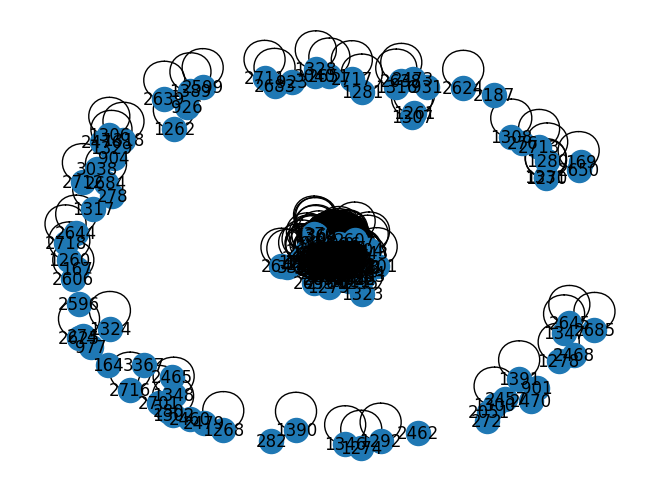

In [ ]:
nx.draw(G, with_labels=True)